In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from numpy import log


In [3]:
data = "https://raw.githubusercontent.com/whosphong/STAT-CONSULT---UAstat590/refs/heads/main/Measuring%20Quality%20Time%20-%20Sheet1.csv"

df = pd.read_csv(data)

In [4]:
df

,Month,Batch,AQI
0,jan94,2339,86.63
1,feb94,2275,84.60
2,mar94,2881,87.04
3,apr94,2780,87.19
4,may94,3227,87.91
5,jun94,3291,87.99
6,jul94,2944,88.09
7,aug94,3163,88.25
8,sep94,2770,87.62
9,oct94,2827,87.43


In [6]:
df['Month'] = pd.to_datetime(df['Month'], format='%b%y')

In [7]:
df

,Month,Batch,AQI
0,1994-01-01,2339,86.63
1,1994-02-01,2275,84.60
2,1994-03-01,2881,87.04
3,1994-04-01,2780,87.19
4,1994-05-01,3227,87.91
5,1994-06-01,3291,87.99
6,1994-07-01,2944,88.09
7,1994-08-01,3163,88.25
8,1994-09-01,2770,87.62
9,1994-10-01,2827,87.43


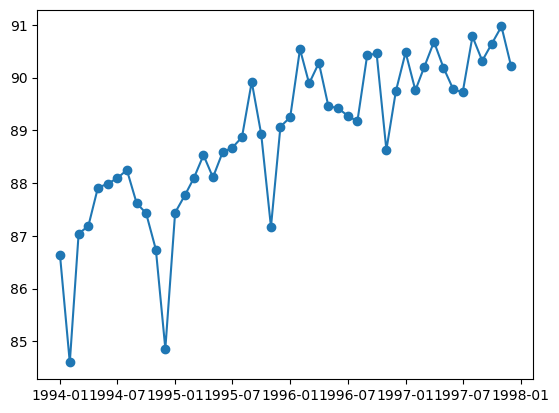

In [11]:
plt.plot(df['Month'], df['AQI'], marker='o')

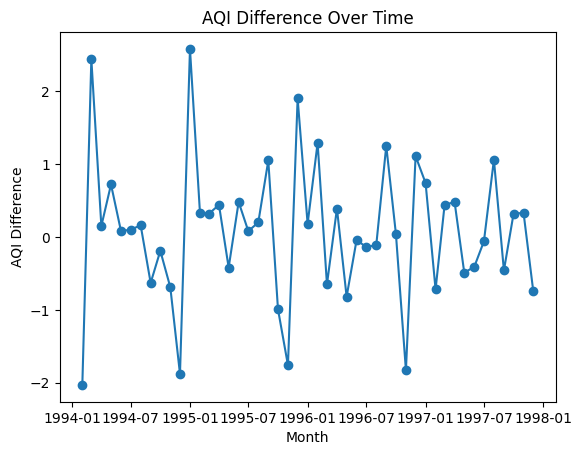

In [ ]:
## Transformation later

df['AQI_diff'] = df['AQI'].diff()

plt.plot(df['Month'], df['AQI_diff'], marker='o')
plt.xlabel('Month')
plt.ylabel('AQI Difference')
plt.title('AQI Difference Over Time')
plt.show()

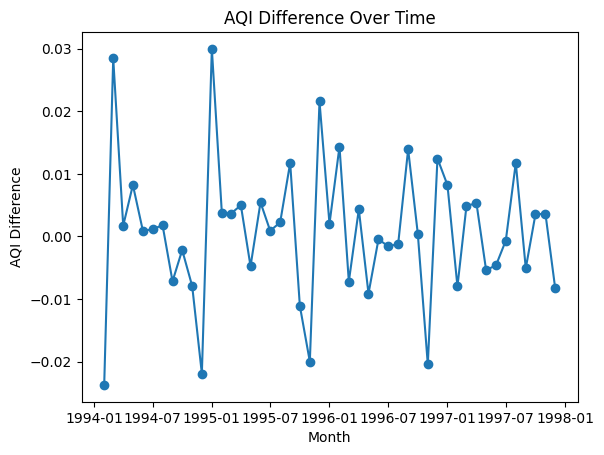

In [24]:
from numpy import log

df['AQI_diff'] = log(df['AQI']).diff()

plt.plot(df['Month'], df['AQI_diff'], marker='o')
plt.xlabel('Month')
plt.ylabel('AQI Difference')
plt.title('AQI Difference Over Time')
plt.show()


In [29]:
result = adfuller(df.AQI.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.525115
p-value: 0.109483


In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

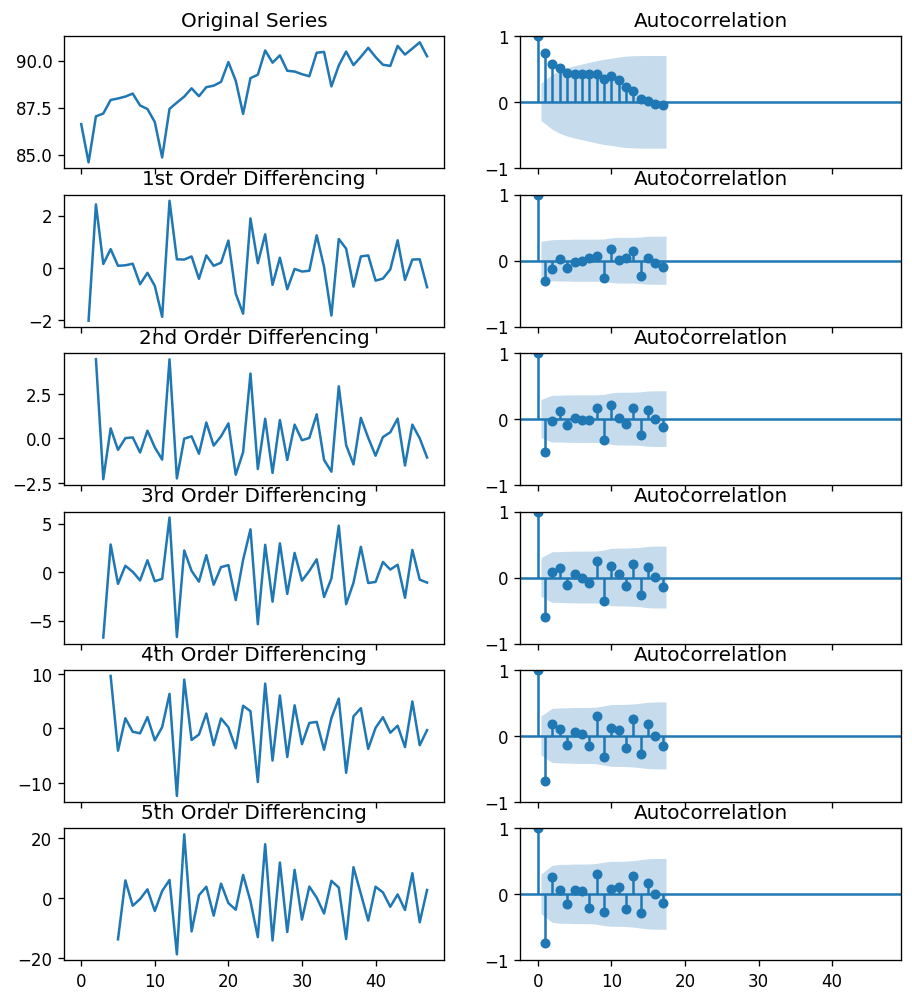

In [36]:
plt.rcParams.update({'figure.figsize':(9,10), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(6, 2, sharex=True)
axes[0, 0].plot(df.AQI); axes[0, 0].set_title('Original Series')
plot_acf(df.AQI, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.AQI.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.AQI.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.AQI.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.AQI.diff().diff().dropna(), ax=axes[2, 1])

# 3rd Differencing
axes[3, 0].plot(df.AQI.diff().diff().diff()); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(df.AQI.diff().diff().diff().dropna(), ax=axes[3, 1])

# 4th Differencing
axes[4, 0].plot(df.AQI.diff().diff().diff().diff()); axes[4, 0].set_title('4th Order Differencing')
plot_acf(df.AQI.diff().diff().diff().diff().dropna(), ax=axes[4, 1])

# 5th Differencing
axes[5, 0].plot(df.AQI.diff().diff().diff().diff().diff()); axes[5, 0].set_title('5th Order Differencing')
plot_acf(df.AQI.diff().diff().diff().diff().diff().dropna(), ax=axes[5, 1])

plt.show()

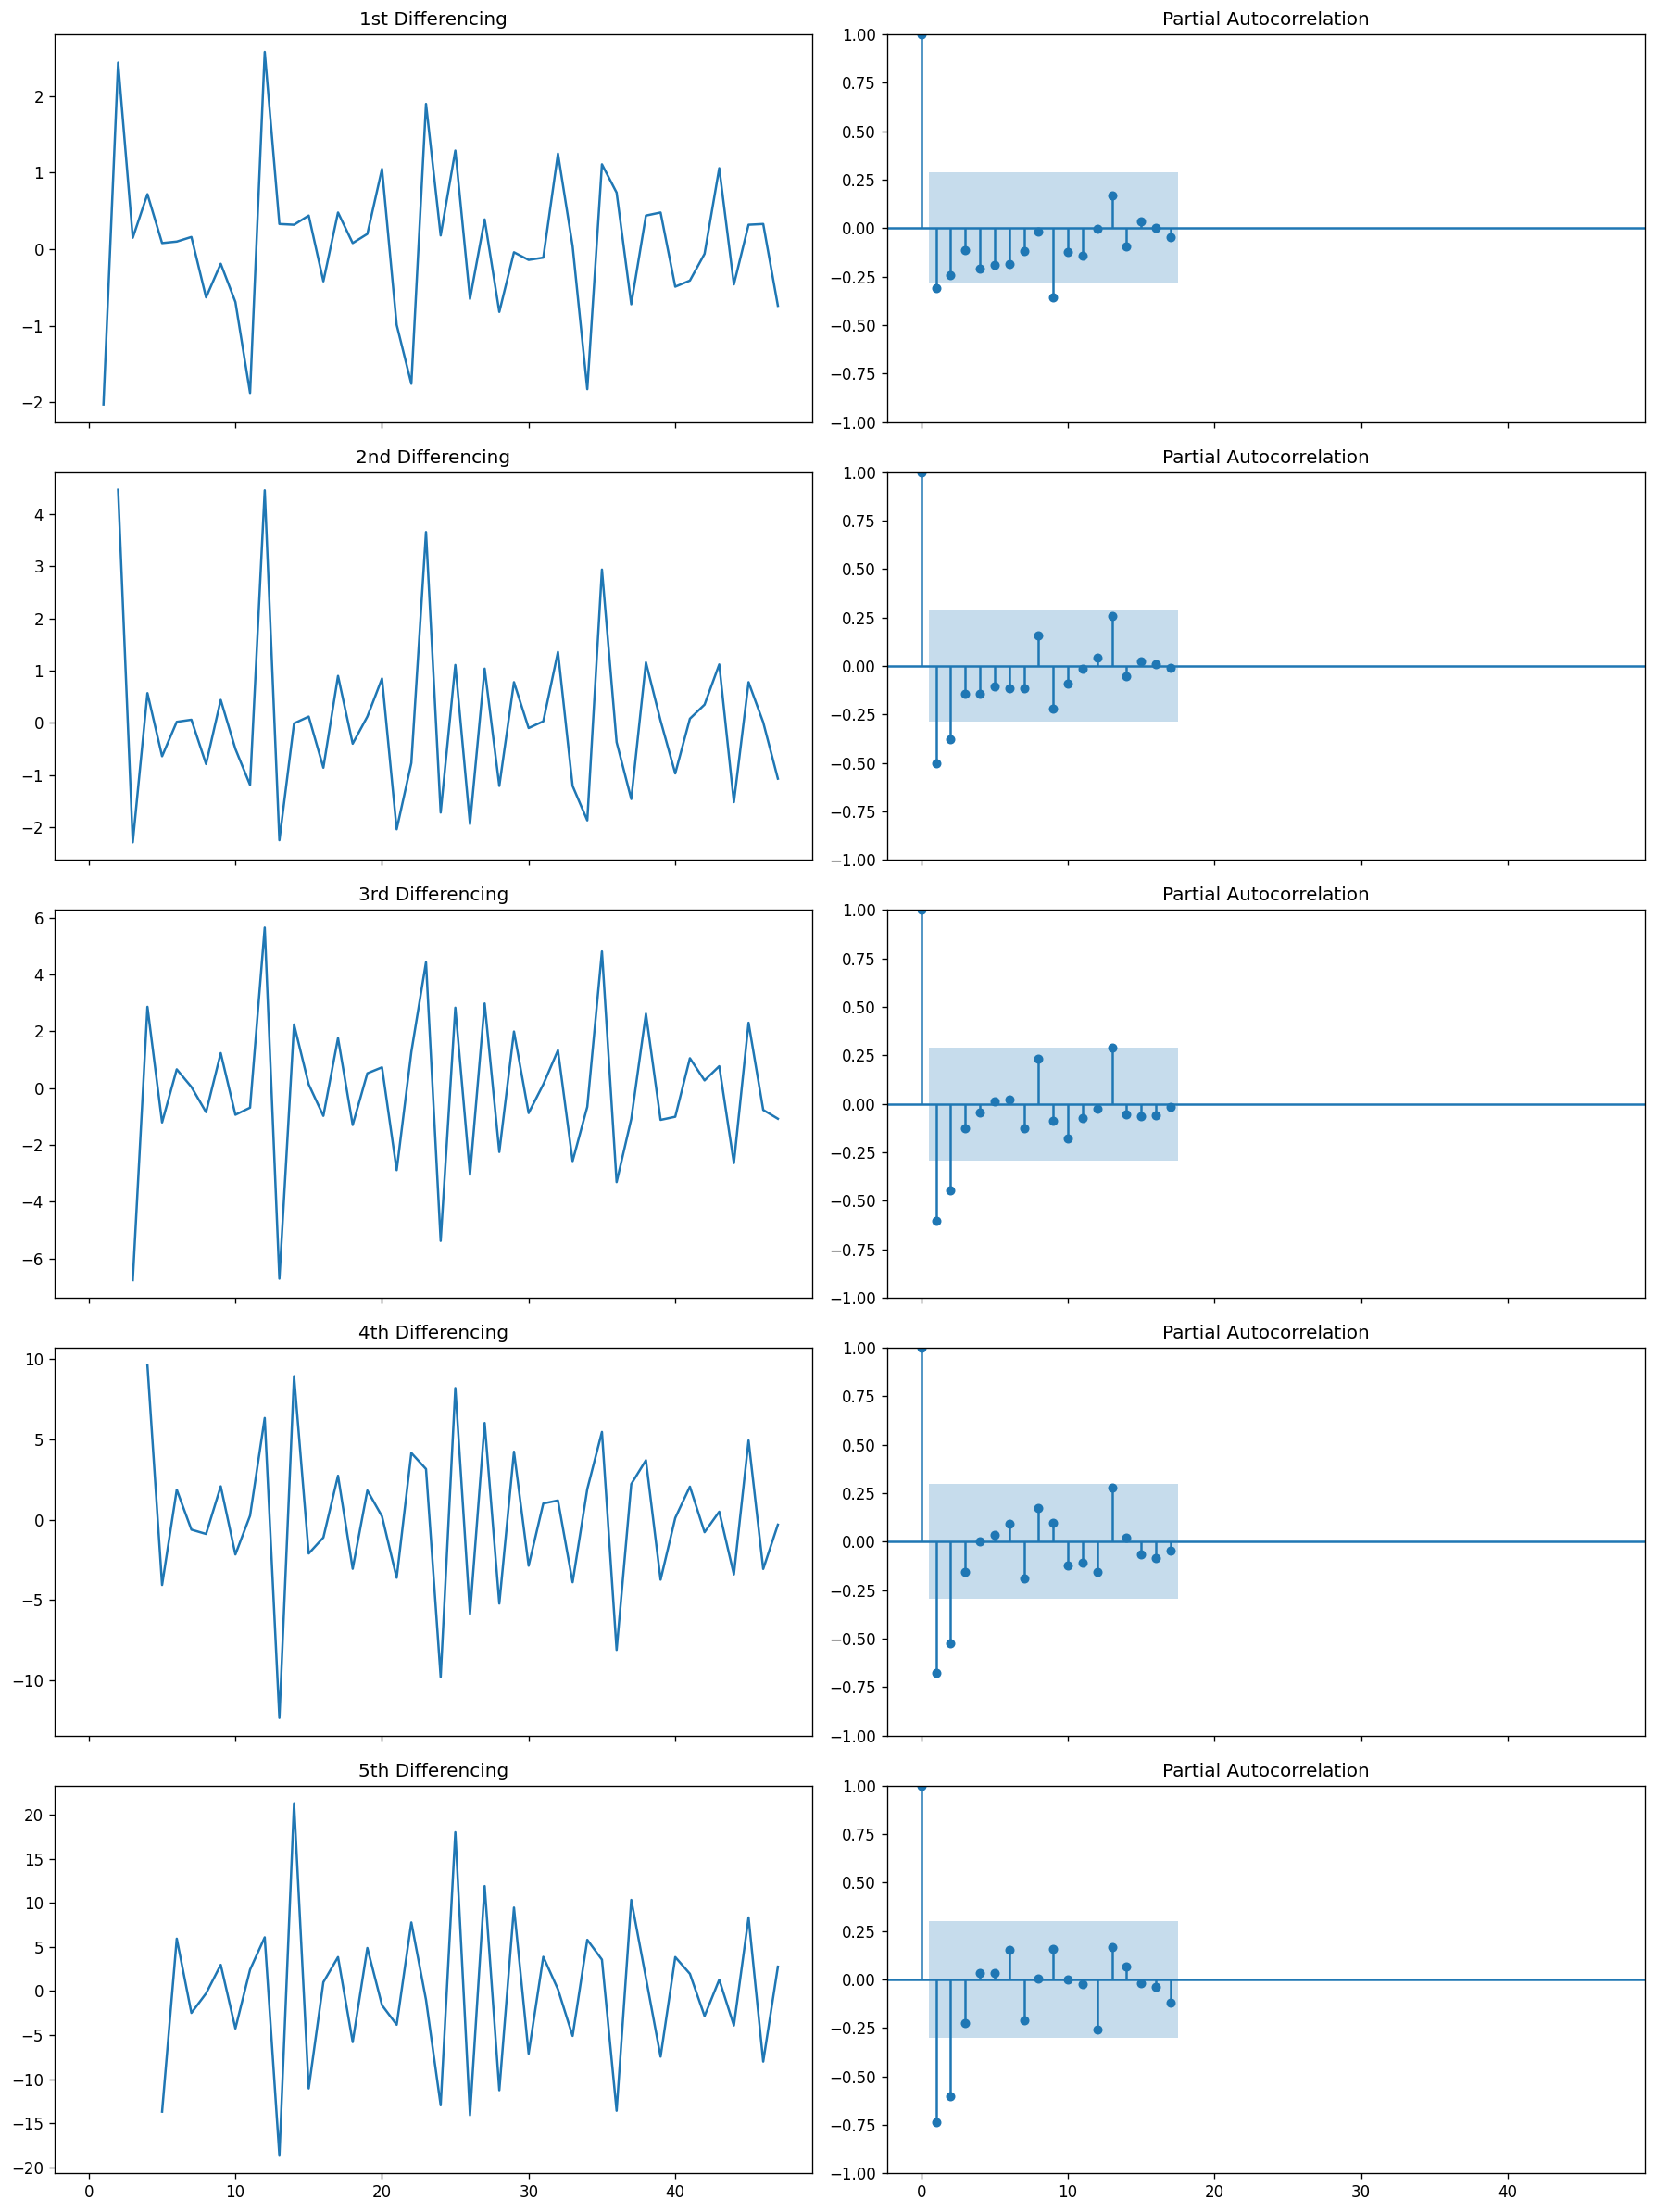

In [39]:
plt.rcParams.update({'figure.figsize':(15, 20), 'figure.dpi':120})

fig, axes = plt.subplots(5, 2, sharex=True)

# 1st Differencing
axes[0, 0].plot(df.AQI.diff()); axes[0, 0].set_title('1st Differencing')
axes[0, 1].set(ylim=(0, 5))
plot_pacf(df.AQI.diff().dropna(), ax=axes[0, 1])
axes[0, 1].set_title('Partial Autocorrelation')

# 2nd Differencing
axes[1, 0].plot(df.AQI.diff().diff()); axes[1, 0].set_title('2nd Differencing')
axes[1, 1].set(ylim=(0, 5))
plot_pacf(df.AQI.diff().diff().dropna(), ax=axes[1, 1])
axes[1, 1].set_title('Partial Autocorrelation')

# 3rd Differencing
axes[2, 0].plot(df.AQI.diff().diff().diff()); axes[2, 0].set_title('3rd Differencing')
axes[2, 1].set(ylim=(0, 5))
plot_pacf(df.AQI.diff().diff().diff().dropna(), ax=axes[2, 1])
axes[2, 1].set_title('Partial Autocorrelation')

# 4th Differencing
axes[3, 0].plot(df.AQI.diff().diff().diff().diff()); axes[3, 0].set_title('4th Differencing')
axes[3, 1].set(ylim=(0, 5))
plot_pacf(df.AQI.diff().diff().diff().diff().dropna(), ax=axes[3, 1])
axes[3, 1].set_title('Partial Autocorrelation')

# 5th Differencing
axes[4, 0].plot(df.AQI.diff().diff().diff().diff().diff()); axes[4, 0].set_title('5th Differencing')
axes[4, 1].set(ylim=(0, 5))
plot_pacf(df.AQI.diff().diff().diff().diff().diff().dropna(), ax=axes[4, 1])
axes[4, 1].set_title('Partial Autocorrelation')

plt.tight_layout()
plt.show()
